In [20]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [21]:
iris=datasets.load_iris()
features=iris.data
target=iris.target
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [22]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
target_names=iris.target_names
labels=target_names[target] #將0,1,2,轉換成文字的部分 

In [25]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [26]:
a = [[1,2,3],[4,5,6]]
b = [[7,8,9],[4,4,4]]
np.c_[a,b] #一維陣列須注意，np.r是疊上去

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 4, 4, 4]])

In [27]:
setosa_petal_length=features[labels=='setosa',2] #數字代表feature_names 0,1,2,3
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]

In [28]:
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]

In [29]:
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

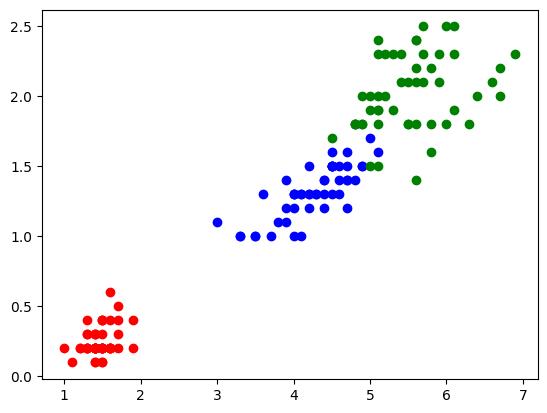

In [30]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [31]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]#把target變成0,1,2
print(training_data.shape)

(150, 2)


In [32]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [36]:
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

In [38]:
print(yy)
print('---------------------------------------------------------')
print(xx)

[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 ... -0.86 -0.86 -0.86]
 ...
 [ 3.44  3.44  3.44 ...  3.44  3.44  3.44]
 [ 3.46  3.46  3.46 ...  3.46  3.46  3.46]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]]
---------------------------------------------------------
[[0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 ...
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]]


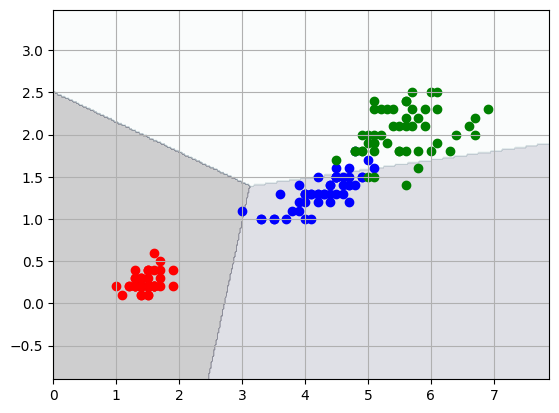

In [33]:
training_x_min=training_data[:,0].min()-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.show()
#mershgrid 對稱畫網格

# 重要參數
## C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。
## gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')
## kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等
https://scikit-learn.org/stable/modules/svm.html<br>
svm.LinearSVC (Linear Support Vector Classification)與svm.SVC(kernel=’linear’)差異<br>
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

In [39]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(setosa[:,0],setosa[:,1],color='red')
    plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
    plt.scatter(virginica[:,0],virginica[:,1],color='green')
    plt.title(title)
    plt.show()

In [40]:
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
xx

array([[0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       ...,
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88],
       [0.  , 0.02, 0.04, ..., 7.84, 7.86, 7.88]])

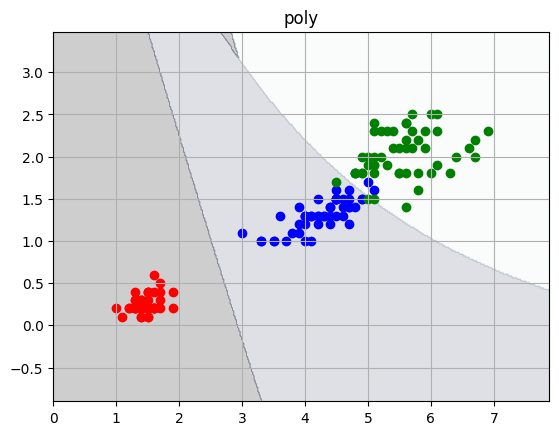

In [41]:
clf=svm.SVC(kernel='poly')
clf.fit(training_data,training_labels)
SVM_plot(clf,'poly') #顏色為分類區

## 換特徵

In [42]:
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

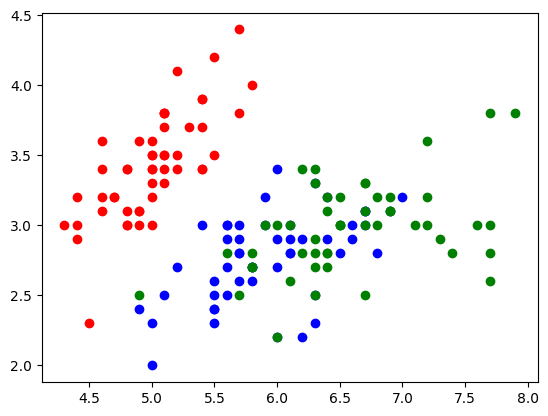

In [43]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [44]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2] #做0,1,2label回來

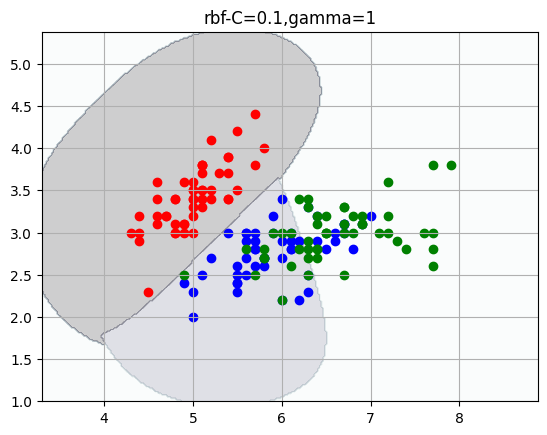

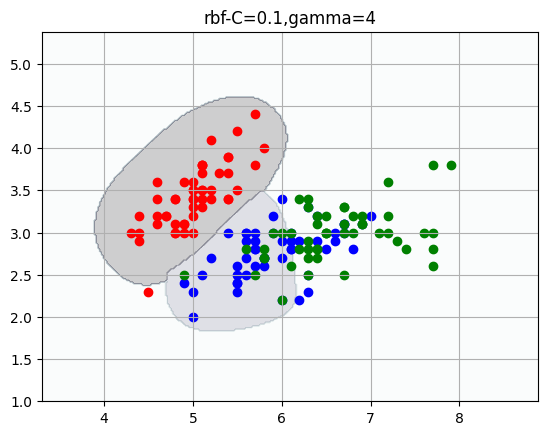

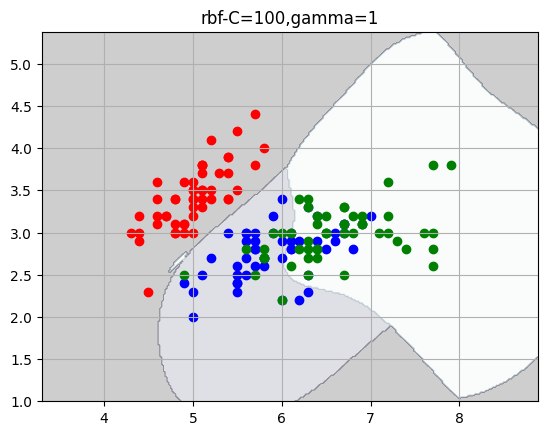

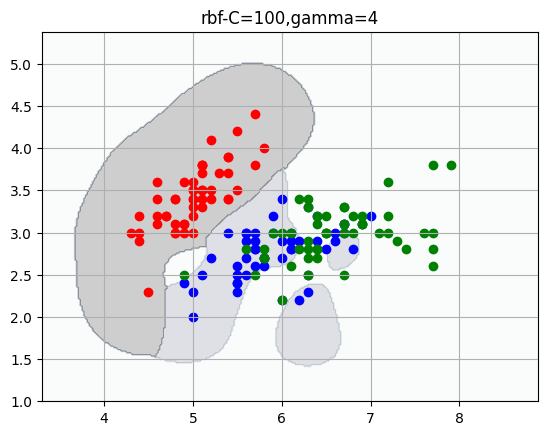

In [52]:
C = [0.1,100]
gamma = [1,4]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='rbf',C=C[i],gamma=gamma[j])
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))

# 整體流程

## Step1. 下載資料

In [60]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

## Step2. 區分訓練集與測試集

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [62]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

## Step4. 預測

In [63]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## Step5. 準確度分析

In [64]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777
